# 1. Setup and Get Data

### 1.1 Install Dependencies and Setup

In [1]:
%pip install labelme tensorflow tensorflow opencv-python matplotlib albumentations

  Using cached labelme-5.4.1.tar.gz (1.4 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached imgviz-1.7.5.tar.gz (7.7 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached natsort-8.4.0-py3-none-any.whl.metadata (21 kB)
  Using cached scikit_image-0.22.0-cp310-cp310-win_amd64.whl.metadata (13 kB)
  Using cached PyQt5-5.15.10-cp37-abi3-win_amd64.whl.metadata (2.2 kB)
     ---------------------------------------- 60.4/60.4 kB 1.6 MB/s eta 0:00:00
  Using cached qudida-0.0.4-py3-none-any.whl (3.5 kB)
  Using cached coloredlogs-15.0.1-py2.py3-none-any.whl (46 kB)
  Using cached PyQt5_sip-12.13.0-cp310-cp310-win_amd64.whl.metadata (524 bytes)
  Using cached PyQt5_Qt5-5.15.2-py3-none-win_amd64.whl (50.1 MB)
  Using cached opencv_python_headless-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached lazy_loader-0.3-py3-none-any.whl.metadata (4.3 kB)

### 1.2 Collect Images Using OpenCV

In [1]:
import os
import time
import uuid
import cv2

In [2]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

In [3]:
os.makedirs(IMAGES_PATH, exist_ok=True)


In [28]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [17]:
%pip install labelme


### 1.3 Annotate Images with LabelMe

In [18]:
%pip install PyQt5



Note: you may need to restart the kernel to use updated packages.

In [29]:
import labelme

In [9]:
%pip install PySide2


[notice] A new release of pip available: 22.2.2 -> 24.0

[notice] To update, run: python.exe -m pip install --upgrade pip

In [10]:
%pip install labelme


[notice] A new release of pip available: 22.2.2 -> 24.0

[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: Pillow>=2.8 in c:\users\dantu\appdata\local\programs\python\python310\lib\site-packages (from labelme) (10.1.0)



In [4]:
%pip show labelme

Name: labelmeNote: you may need to restart the kernel to use updated packages.



Version: 5.4.1
Summary: Image Polygonal Annotation with Python
Home-page: https://github.com/wkentaro/labelme
Author: Kentaro Wada
Author-email: www.kentaro.wada@gmail.com
License: GPLv3
Location: c:\users\dantu\appdata\local\packages\pythonsoftwarefoundation.python.3.10_qbz5n2kfra8p0\localcache\local-packages\python310\site-packages
Requires: colorama, gdown, imgviz, matplotlib, natsort, numpy, onnxruntime, Pillow, PyQt5, PyYAML, qtpy, scikit-image, termcolor
Required-by: 


In [5]:
import sys

# Add the path to the directory where 'labelme' is installed
labelme_path = r'c:\users\dantu\appdata\roaming\python\python39\site-packages'
sys.path.append(labelme_path)

# Now import 'labelme'
import labelme

In [22]:
import labelme

In [30]:
!labelme

2024-02-20 19:32:21,033 [INFO   ] __init__:get_config:67- Loading config file from: C:\Users\dantu\.labelmerc


# 2. Review Dataset and Build Image Loading Function

### 2.1 Import TF and Deps

In [31]:
%pip install tensorflow

In [32]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [6]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

### 2.2 Limit GPU Memory Growth

In [7]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [8]:
tf.config.list_physical_devices('GPU')

[]

### 2.3 Load Image into TF Data Pipeline

In [9]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg')

In [10]:
images.as_numpy_iterator().next()

b'data\\images\\5529deb4-cff8-11ee-a146-e0c171b96ad2.jpg'

In [11]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [12]:
images = images.map(load_image)

In [13]:
images.as_numpy_iterator().next()

array([[[150, 175, 156],
        [149, 174, 155],
        [150, 173, 157],
        ...,
        [ 83,  57,  60],
        [ 83,  59,  59],
        [ 69,  48,  47]],

       [[148, 171, 153],
        [148, 171, 153],
        [149, 172, 156],
        ...,
        [ 74,  50,  50],
        [ 74,  53,  52],
        [ 71,  51,  50]],

       [[151, 172, 155],
        [150, 171, 154],
        [149, 170, 155],
        ...,
        [ 68,  49,  45],
        [ 64,  46,  42],
        [ 65,  47,  43]],

       ...,

       [[131, 150, 146],
        [132, 151, 147],
        [136, 152, 149],
        ...,
        [175, 175, 183],
        [176, 175, 183],
        [179, 178, 186]],

       [[133, 149, 146],
        [135, 151, 148],
        [136, 151, 148],
        ...,
        [175, 175, 183],
        [175, 174, 182],
        [176, 175, 183]],

       [[132, 148, 145],
        [133, 149, 146],
        [133, 148, 145],
        ...,
        [176, 176, 184],
        [175, 174, 182],
        [176, 175, 183]]

In [14]:
type(images)

tensorflow.python.data.ops.dataset_ops.MapDataset

### 2.4 View Raw Images with Matplotlib

In [15]:
image_generator = images.batch(4).as_numpy_iterator()

In [16]:
plot_images = image_generator.next()

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

# 3. Partition Unaugmented Data

### 3.2 Move the Matching Labels

In [111]:
###  Split data into train, test and val manually
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)      

# 4. Apply Image Augmentation on Images and Labels using Albumentations

### 4.1 Setup Albumentations Transform Pipeline

In [19]:
import albumentations as alb

In [20]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

### 4.2 Load a Test Image and Annotation with OpenCV and JSON

In [21]:
img = cv2.imread(os.path.join('data','train', 'images','3f6629a7-cff8-11ee-beb9-e0c171b96ad2.jpg'))

In [22]:
img

array([[[251, 254, 245],
        [251, 254, 245],
        [251, 255, 244],
        ...,
        [109, 114, 123],
        [108, 114, 125],
        [ 98, 106, 119]],

       [[250, 253, 244],
        [251, 254, 245],
        [251, 255, 244],
        ...,
        [106, 111, 120],
        [105, 111, 122],
        [105, 113, 126]],

       [[249, 252, 243],
        [250, 253, 244],
        [251, 255, 244],
        ...,
        [102, 108, 115],
        [ 98, 104, 115],
        [101, 109, 122]],

       ...,

       [[244, 249, 218],
        [244, 249, 218],
        [241, 246, 215],
        ...,
        [ 84,  85,  95],
        [ 88,  87,  97],
        [ 85,  84,  94]],

       [[239, 243, 214],
        [240, 244, 215],
        [239, 243, 214],
        ...,
        [ 91,  92, 102],
        [ 89,  87,  99],
        [ 79,  77,  89]],

       [[242, 246, 217],
        [243, 247, 218],
        [240, 244, 215],
        ...,
        [ 89,  90, 100],
        [ 88,  86,  98],
        [ 80,  78,  90]]

In [23]:
with open(os.path.join('data', 'train', 'labels', '3f6629a7-cff8-11ee-beb9-e0c171b96ad2.json'), 'r') as f:
    label = json.load(f)

In [24]:
label['shapes'][0]['points']

[[243.35025380710658, 112.33502538071068],
 [434.21319796954316, 367.66497461928935]]

### 4.3 Extract Coordinates and Rescale to Match Image Resolution

In [25]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [26]:
coords

[243.35025380710658,
 112.33502538071068,
 434.21319796954316,
 367.66497461928935]

In [27]:
coords = list(np.divide(coords, [640,480,640,480]))

In [28]:
coords

[0.380234771573604,
 0.23403130287648058,
 0.6784581218274112,
 0.7659686971235194]

### 4.4 Apply Augmentations and View Results

In [29]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [30]:
augmented

{'image': array([[[249, 254, 245],
         [249, 254, 245],
         [248, 253, 244],
         ...,
         [246, 249, 217],
         [245, 248, 216],
         [247, 250, 218]],
 
        [[249, 254, 245],
         [249, 254, 245],
         [250, 253, 244],
         ...,
         [244, 247, 215],
         [243, 246, 214],
         [243, 246, 214]],
 
        [[251, 255, 244],
         [249, 255, 244],
         [250, 254, 243],
         ...,
         [246, 248, 218],
         [244, 246, 216],
         [243, 245, 215]],
 
        ...,
 
        [[226, 228, 216],
         [222, 226, 215],
         [219, 223, 212],
         ...,
         [252, 252, 252],
         [251, 251, 251],
         [252, 252, 252]],
 
        [[225, 229, 217],
         [224, 228, 217],
         [220, 223, 214],
         ...,
         [252, 252, 252],
         [251, 251, 251],
         [252, 252, 252]],
 
        [[224, 228, 217],
         [223, 227, 216],
         [221, 224, 215],
         ...,
         [252, 252,

In [31]:
augmented['bboxes'][0][2:]

(0.6881105470953187, 0.7548110547095318)

In [32]:
augmented['bboxes']

[(0.263970671178793,
  0.18741116751269038,
  0.6881105470953187,
  0.7548110547095318)]

In [ ]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

# 5. Build and Run Augmentation Pipeline

### 5.1 Run Augmentation Pipeline

In [31]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

x_max is less than or equal to x_min for bbox [0.12484137055837563, 0.9594966159052453, 0.0, 0.5120259779038518, 'face'].


### 5.2 Load Augmented Images to Tensorflow Dataset

In [41]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [42]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [43]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [44]:
train_images.as_numpy_iterator().next()

array([[[0.93921566, 0.94754905, 0.9642157 ],
        [0.97205883, 0.99558824, 0.9867647 ],
        [0.97107846, 0.9867647 , 0.98284316],
        ...,
        [0.8666054 , 0.988174  , 0.9685662 ],
        [0.87169117, 0.99718136, 0.98541665],
        [0.8596201 , 0.98970586, 0.9811887 ]],

       [[0.9166667 , 0.925     , 0.94166666],
        [0.96813726, 0.9916667 , 0.98284316],
        [0.972549  , 0.9882353 , 0.9843137 ],
        ...,
        [0.85520834, 0.97726715, 0.9576593 ],
        [0.8533088 , 0.9709559 , 0.96911764],
        [0.8595588 , 0.98180145, 0.9802696 ]],

       [[0.904902  , 0.9132353 , 0.92990196],
        [0.96568626, 0.9892157 , 0.98039216],
        [0.96911764, 0.9848039 , 0.98088235],
        ...,
        [0.8537378 , 0.97922796, 0.9596201 ],
        [0.84160537, 0.9670956 , 0.9553309 ],
        [0.85379905, 0.9841912 , 0.98517156]],

       ...,

       [[0.9278799 , 0.9990196 , 0.9606005 ],
        [0.9204657 , 0.9976103 , 0.95490193],
        [0.92493874, 0

# 6. Prepare Labels

### 6.1 Build Label Loading Function

In [45]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

### 6.2 Load Labels to Tensorflow Dataset

In [46]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [47]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [48]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [49]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.12396, 0.2096 , 0.5483 , 0.777  ], dtype=float16))

# 7. Combine Label and Image Samples

### 7.1 Check Partition Lengths

In [50]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3780, 3780, 780, 780, 780, 780)

### 7.2 Create Final Datasets (Images/Labels)

In [51]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [52]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [53]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [54]:
train.as_numpy_iterator().next()[1]

(array([[0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0]], dtype=uint8),
 array([[0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.    ],
        [0.6445, 0.281 , 0.8716, 0.5327],
        [0.2883, 0.4194, 0.5127, 0.712 ],
        [0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.    ]], dtype=float16))

### 7.3 View Images and Annotations

In [55]:
data_samples = train.as_numpy_iterator()

In [56]:
res = data_samples.next()

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    sample_image_umat = cv2.UMat(sample_image)
    
    cv2.rectangle(sample_image_umat, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

# 8. Build Deep Learning using the Functional API

### 8.1 Import Layers and Base Network

In [58]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

### 8.2 Download VGG16

In [59]:
vgg = VGG16(include_top=False)

In [60]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

### 8.3 Build instance of Network

In [62]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

### 8.4 Test out Neural Network

In [63]:
facetracker = build_model()

In [64]:
facetracker.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_5[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d_2 (Global  (None, 512)         0           ['vgg16[0][0]']                  
 MaxPooling2D)                                                                              

In [65]:
X, y = train.as_numpy_iterator().next()

In [66]:
X.shape

(8, 120, 120, 3)

In [67]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 0s 366ms/step


In [68]:
classes, coords

(array([[0.7163929 ],
        [0.5579788 ],
        [0.58763975],
        [0.61164296],
        [0.520212  ],
        [0.5658318 ],
        [0.5872436 ],
        [0.63982093]], dtype=float32),
 array([[0.73906946, 0.4157498 , 0.40260866, 0.5991177 ],
        [0.6583719 , 0.44814783, 0.36247414, 0.5596079 ],
        [0.60763794, 0.45971835, 0.41733578, 0.58587277],
        [0.7002056 , 0.3870786 , 0.4000011 , 0.59731996],
        [0.68875146, 0.52475995, 0.4423998 , 0.54806376],
        [0.6440161 , 0.412242  , 0.39428437, 0.4942913 ],
        [0.7934796 , 0.3575368 , 0.3530608 , 0.6981741 ],
        [0.69792247, 0.38913843, 0.39459783, 0.59552735]], dtype=float32))

# 9. Define Losses and Optimizers

### 9.1 Define Optimizer and LR

In [69]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [70]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

### 9.2 Create Localization Loss and Classification Loss

In [71]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [72]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

### 9.3 Test out Loss Metrics

In [73]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=6.0710073>

In [74]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.7621895>

In [75]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=6.0710073>

# 10. Train Neural Network

### 10.1 Create Custom Model Class

In [80]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [81]:
model = FaceTracker(facetracker)

In [82]:
model.compile(opt, classloss, regressloss)

### 10.2 Train

In [83]:
logdir='logs'

In [84]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [85]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10


473/473 [==============================] - 576s 1s/step - total_loss: 0.5011 - class_loss: 0.1598 - regress_loss: 0.4212 - val_total_loss: 0.0209 - val_class_loss: 0.0129 - val_regress_loss: 0.0145
Epoch 2/10
473/473 [==============================] - 553s 1s/step - total_loss: 0.1410 - class_loss: 0.0446 - regress_loss: 0.1187 - val_total_loss: 3.3052 - val_class_loss: 2.4798 - val_regress_loss: 2.0653
Epoch 3/10
473/473 [==============================] - 957s 2s/step - total_loss: 0.0856 - class_loss: 0.0268 - regress_loss: 0.0722 - val_total_loss: 0.1761 - val_class_loss: 0.0176 - val_regress_loss: 0.1673
Epoch 4/10
473/473 [==============================] - 3426s 7s/step - total_loss: 0.0598 - class_loss: 0.0158 - regress_loss: 0.0519 - val_total_loss: 1.3363 - val_class_loss: 1.0380 - val_regress_loss: 0.8173
Epoch 5/10
473/473 [==============================] - 565s 1s/step - total_loss: 0.0370 - class_loss: 0.0110 - regress_loss: 0.0315 - val_total_loss: 4.6288e-04 - val_class_l

### 10.3 Plot Performance

In [86]:
hist.history

{'total_loss': [0.02737515978515148,
  0.01700952649116516,
  0.009423118084669113,
  0.005373536609113216,
  0.007275132462382317,
  0.003982855938374996,
  0.006368238478899002,
  0.005846408661454916,
  0.0008315137820318341,
  0.0021934916730970144],
 'class_loss': [0.019162476062774658,
  0.003984937909990549,
  2.126449726347346e-05,
  0.0018123970367014408,
  0.000266481249127537,
  0.00035026943078264594,
  0.004153403453528881,
  0.0012737466022372246,
  0.0009431127109564841,
  0.00045166845666244626],
 'regress_loss': [0.017793921753764153,
  0.01501705776900053,
  0.009412486106157303,
  0.00446733832359314,
  0.0071418918669223785,
  0.0038077214267104864,
  0.0042915367521345615,
  0.005209535360336304,
  0.0003599574265535921,
  0.0019676573574543],
 'val_total_loss': [0.0209280364215374,
  3.305213212966919,
  0.17606401443481445,
  1.3363292217254639,
  0.0004628766910172999,
  0.9218468070030212,
  2.2575602531433105,
  2.942375898361206,
  1.158756971359253,
  4.1787

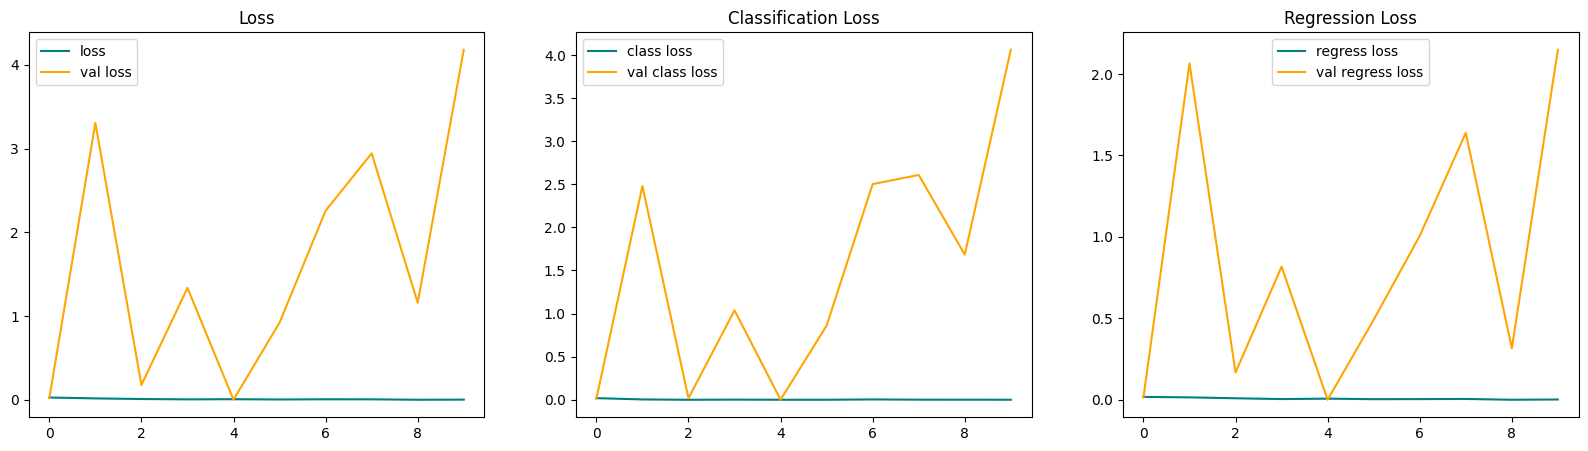

In [93]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

# 11. Make Predictions

### 11.1 Make Predictions on Test Set

In [94]:
test_data = test.as_numpy_iterator()

In [95]:
test_sample = test_data.next()

In [98]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 414ms/step


In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_image_umat = cv2.UMat(sample_image)
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image_umat, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

### 11.2 Save the Model

In [100]:
from tensorflow.keras.models import load_model

In [101]:
facetracker.save('facetracker.h5')

In [102]:
facetracker = load_model('facetracker.h5')

### 11.3 Real Time Detection

In [110]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 95ms/step
